In [1]:
pathBase =  '../'

In [2]:
# librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
# se cargan los datos
path =  pathBase + 'data/processed/Bikes_2018.csv'
dataBikes = pd.read_csv( path  , encoding='utf-8' , engine='python')
dataBikes.head()



,Rented Bike Count,Date,Hour,Seasons,Temperature(°C),Humidity(%),Rainfall(mm),label_day_night,WeekDay,Month,Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Seul
0,206,2018-01-01,0,Winter,-3.2,40.0,0.0,Night,Monday,1,0.5,1358.0,-14.9,1
1,230,2018-01-01,1,Winter,-3.3,41.0,0.0,Night,Monday,1,0.7,2000.0,-14.7,1
2,178,2018-01-01,2,Winter,-3.7,42.0,0.0,Night,Monday,1,0.9,2000.0,-14.7,1
3,119,2018-01-01,3,Winter,-4.0,44.0,0.0,Night,Monday,1,1.0,2000.0,-14.4,1
4,62,2018-01-01,4,Winter,-4.2,53.0,0.0,Night,Monday,1,1.1,1994.0,-12.3,1


In [4]:
dataBikes.shape

(15990, 14)

In [5]:
dataBikes.dtypes

Rented Bike Count              int64
Date                          object
Hour                           int64
Seasons                       object
Temperature(°C)              float64
Humidity(%)                  float64
Rainfall(mm)                 float64
label_day_night               object
WeekDay                       object
Month                          int64
Wind speed (m/s)             float64
Visibility (10m)             float64
Dew point temperature(°C)    float64
Seul                           int64
dtype: object

In [6]:
dataBikes.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,15990.0,489.391495,562.197887,0.0,79.0,275.0,712.75,3556.00
Hour,15990.0,11.519512,6.919167,0.0,6.0,12.0,18.00,23.00
Temperature(°C),15990.0,12.140819,11.173472,-21.9,3.0,12.8,21.50,39.40
Humidity(%),15990.0,65.429706,19.448614,0.0,52.0,67.0,81.00,100.00
Rainfall(mm),15990.0,0.130863,1.038892,0.0,0.0,0.0,0.00,52.30
Month,15990.0,6.027392,3.152433,1.0,3.0,6.0,9.00,11.00
Wind speed (m/s),15990.0,3.201132,2.574012,0.0,1.3,2.5,4.40,21.11
Visibility (10m),15990.0,1475.099124,479.307150,0.0,1369.0,1610.0,1702.00,2000.00
Dew point temperature(°C),15990.0,5.202258,11.857411,-30.6,-2.8,5.8,15.20,27.20
Seul,15990.0,0.501313,0.500014,0.0,0.0,1.0,1.00,1.00


Matriz de correlación por ciudad

In [7]:
#x    = dataBikes.drop(['Rented Bike Count','Date','Seasons','label_day_night','WeekDay'],axis =1)

dataSeul = dataBikes[ dataBikes['Seul']== 1 ]
dataToronto = dataBikes[ dataBikes['Seul']== 0 ]

dataSeul = dataSeul.drop(['Seul'],axis =1) 
dataToronto = dataToronto.drop(['Seul'],axis =1) 


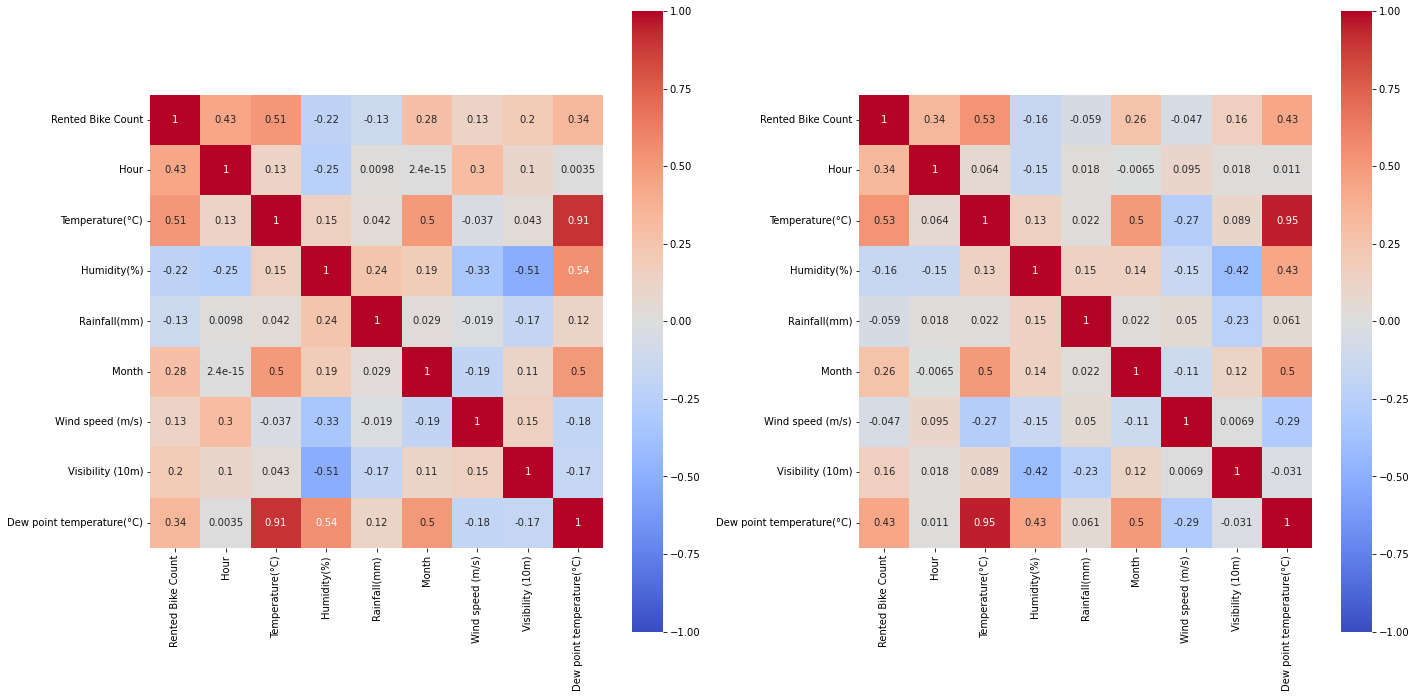

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,10 ))

sns.heatmap(dataSeul.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True 
            , ax= ax[0]);


sns.heatmap(dataToronto.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True
            , ax= ax[1]);

plt.tight_layout()

se observa en ambos dataset que la temperatura y temperatura Dew estan fuertemente relacionadas, por lo que dejaremos fuera la variable temperatura *Dew*

In [9]:
dataBikes=dataBikes.drop(['Dew point temperature(°C)'],axis=1)
dataSeul=dataSeul.drop(['Dew point temperature(°C)'],axis=1)
dataToronto=dataToronto.drop(['Dew point temperature(°C)'],axis=1)


**Ranking de correlaciones**

In [10]:
# Seul
df1Corr=pd.DataFrame(dataSeul.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Seul'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Seul
Rented Bike Count,1.000000
Temperature(°C),0.508944
Hour,0.432058
Month,0.278708
Visibility (10m),0.201053
Wind speed (m/s),0.131192
Rainfall(mm),-0.132293
Humidity(%),-0.216832


In [11]:
#Toronto
df1Corr=pd.DataFrame(dataToronto.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Toronto'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Toronto
Rented Bike Count,1.000000
Temperature(°C),0.525416
Hour,0.341468
Month,0.261524
Visibility (10m),0.160648
Wind speed (m/s),-0.047326
Rainfall(mm),-0.059074
Humidity(%),-0.157434


Se observa que el ranking de correlación para la demanda de bicicletas en Toronto y Seul presenta el mismo comportamiento en ambos casos



**Analisis por hora**

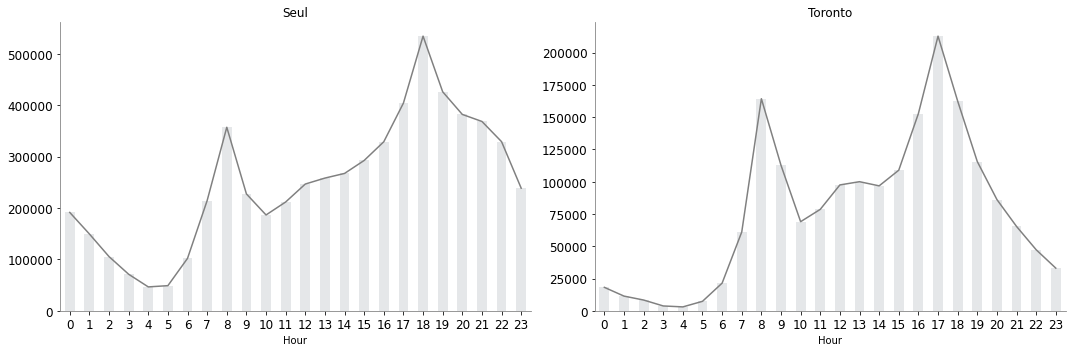

In [12]:
def hide_border(ax):
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.spines['bottom'].set_color('Grey')
    ax.spines['left'].set_color('Grey')


fig, ax = plt.subplots(1,2, figsize=(15,5 ))

hide_border(ax[0])
hide_border(ax[1])

fontsize=12


dataSeul.groupby('Hour').sum()['Rented Bike Count'].plot.bar(ax=ax[0] , title='Seul' ,  color='#E5E7E9' , fontsize = fontsize )
dataSeul.groupby('Hour').sum()['Rented Bike Count'].plot(ax=ax[0] ,  color='Grey' )

dataToronto.groupby('Hour').sum()['Rented Bike Count'].plot.bar(ax=ax[1] , title='Toronto' , color='#E5E7E9' , fontsize = fontsize )
dataToronto.groupby('Hour').sum()['Rented Bike Count'].plot(ax=ax[1] ,  color='Grey'  )



plt.tight_layout()



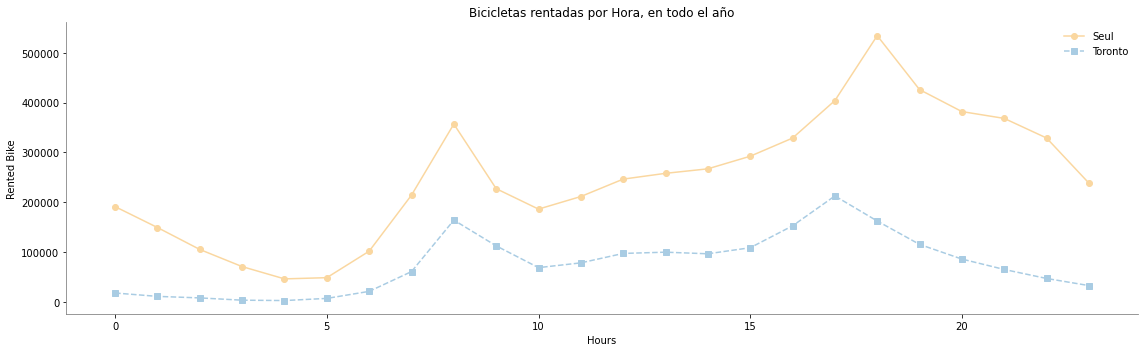

In [13]:
fig, ax = plt.subplots(figsize=(16,5 ))

ax.plot(dataSeul.groupby('Hour').sum()['Rented Bike Count'] , 'o-', label='Seul', color='#FAD7A0' )
ax.plot(dataToronto.groupby('Hour').sum()['Rented Bike Count'], 's--', label='Toronto', color= '#A9CCE3'  )

ax.set_title("Bicicletas rentadas por Hora, en todo el año")
ax.set_xlabel("Hours")
ax.set_ylabel("Rented Bike")
ax.legend(  frameon=False)

hide_border(ax)

fig.tight_layout()




Pero hay una diferencia poblacional entre ambas ciudades, por lo que se corrige en función de la población de cada ciudad, comparando la variable rented bike por habitante.

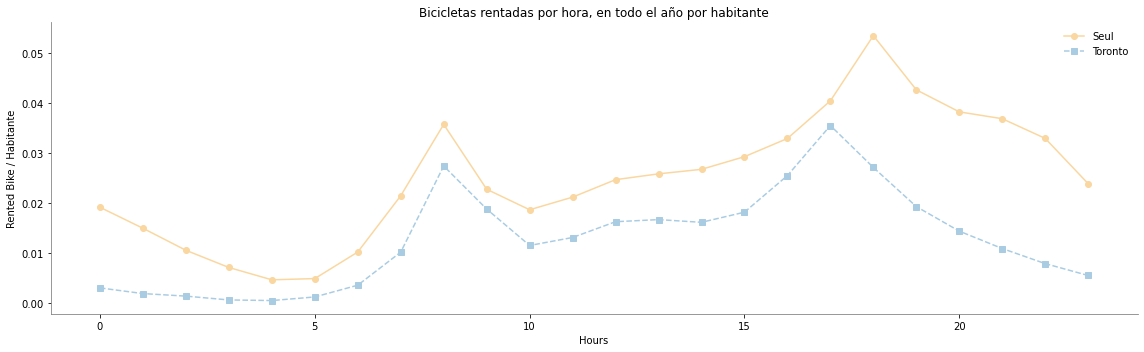

In [14]:
fig, ax = plt.subplots(figsize=(16,5 ))

ax.plot(dataSeul.groupby('Hour').sum()['Rented Bike Count']/10000000 , 'o-', label='Seul', color='#FAD7A0' )
ax.plot(dataToronto.groupby('Hour').sum()['Rented Bike Count']/6000000, 's--', label='Toronto', color='#A9CCE3')

ax.set_title("Bicicletas rentadas por hora, en todo el año por habitante")
ax.set_xlabel("Hours")
ax.set_ylabel("Rented Bike / Habitante")
ax.legend(frameon=False)
hide_border(ax)
fig.tight_layout()


Al corregir por habitante se observa que la tendencia en la demanda de bicicletas es mayor en Seul que Toronto, presentándose los peaks de consumo al inicio del día laboral y al final del mismo.

**Analisis por hora (toda la data) del año**

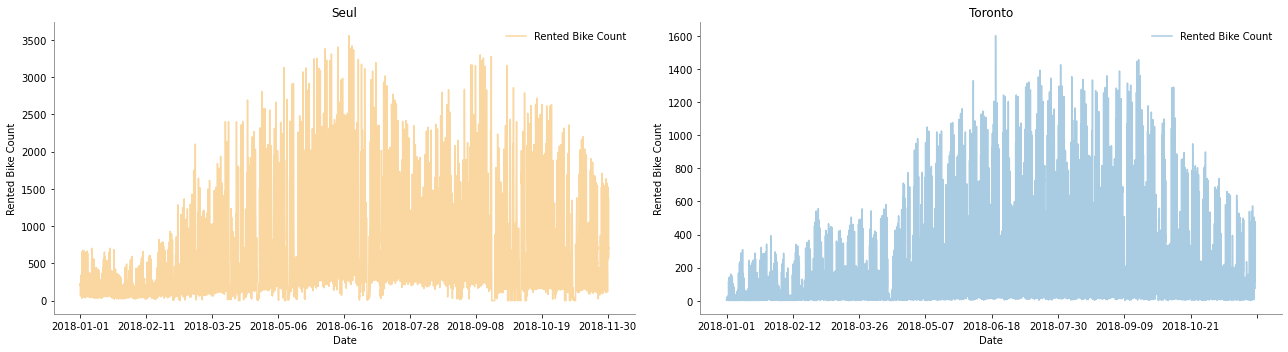

In [15]:

fig, ax = plt.subplots(1,2, figsize=(18,5 ))
hide_border(ax[0])
hide_border(ax[1])


dataSeul.plot(x='Date',y='Rented Bike Count',kind='line' , ax=ax[0] , title = 'Seul' , color='#FAD7A0')
dataToronto.plot(x='Date',y='Rented Bike Count',kind='line', ax=ax[1] , title = 'Toronto' , color='#A9CCE3' )

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()


**Analisis por hora (toda la data) del año (Normalizada)** 

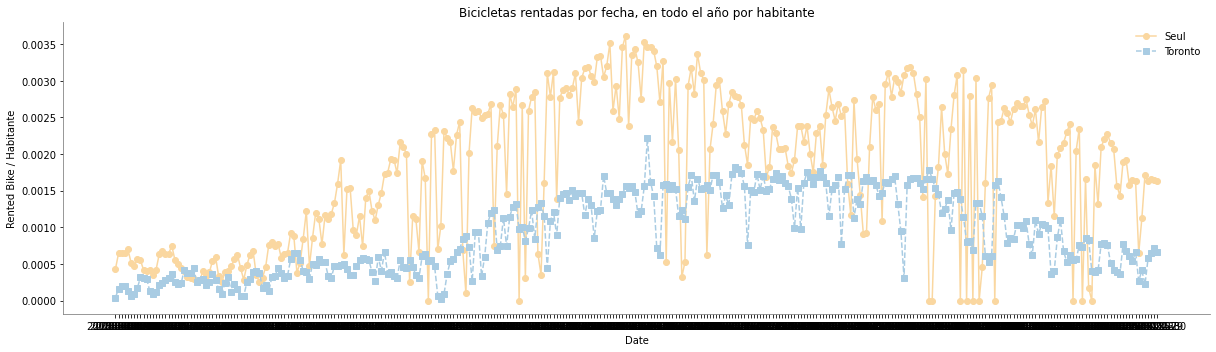

In [16]:
fig, ax = plt.subplots(figsize=(17,5 ))
hide_border(ax)

ax.plot(dataSeul.groupby('Date').sum()['Rented Bike Count']/10000000 , 'o-', label='Seul', color='#FAD7A0')
ax.plot(dataToronto.groupby('Date').sum()['Rented Bike Count']/6000000, 's--', label='Toronto', color='#A9CCE3')

ax.set_title("Bicicletas rentadas por fecha, en todo el año por habitante")
ax.set_xlabel("Date")
ax.set_ylabel("Rented Bike / Habitante")

ax.legend(frameon=False)



fig.tight_layout()




Para el caso de Seúl se observa que la mayor  demanda de bicicletas ocurre en Verano y Otoño, mientras que en Toronto se observa que la mayor demanda se observa en las estaciones de Verano y Primavera  


**Analisis por estaciones de año**

In [17]:
#Seul
df1VizSeasons=pd.DataFrame(dataSeul.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,301839


In [18]:
#Toronto
df1VizSeasons=pd.DataFrame(dataToronto.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,842388
Spring,509156
Autumn,339283
Winter,147559


**Analisis por dia de la semana**

In [19]:

df1VizDays=pd.DataFrame(dataSeul.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))




,Rented Bike Count
WeekDay,
Friday,910718
Wednesday,901349
Monday,890580
Saturday,854453
Tuesday,834854
Thursday,834724
Sunday,760306


In [20]:
df1VizDays=pd.DataFrame(dataToronto.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Wednesday,301014
Thursday,290515
Friday,280491
Tuesday,277731
Monday,253003
Saturday,222511
Sunday,213121


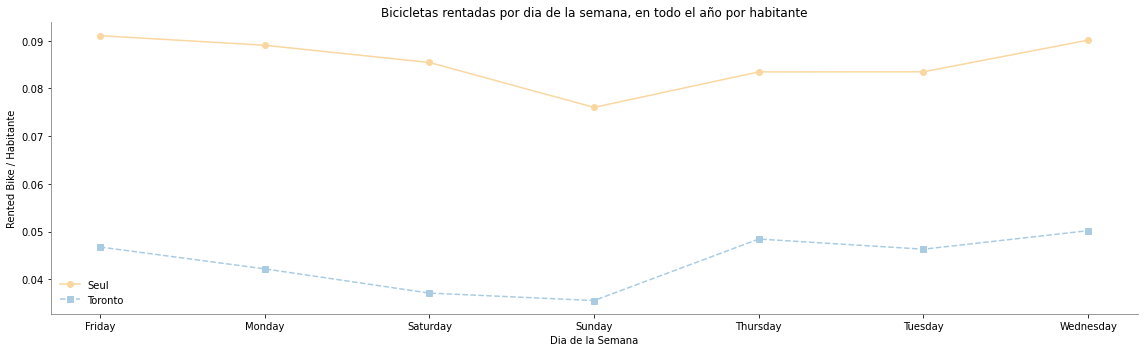

In [21]:
fig, ax = plt.subplots(figsize=(16,5 ))
hide_border(ax)

ax.plot(dataSeul.groupby('WeekDay').sum()['Rented Bike Count']/10000000 , 'o-', label='Seul', color='#FAD7A0')
ax.plot(dataToronto.groupby('WeekDay').sum()['Rented Bike Count']/6000000, 's--', label='Toronto', color='#A9CCE3')

ax.set_title("Bicicletas rentadas por dia de la semana, en todo el año por habitante")
ax.set_xlabel("Dia de la Semana")
ax.set_ylabel("Rented Bike / Habitante")

ax.legend(frameon=False)

fig.tight_layout()

**Analisis por mes**

In [22]:
df1VizDays=pd.DataFrame(dataSeul.groupby('Month').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient( cmap=sns.light_palette("red", as_cmap=True))


,Rented Bike Count
Month,
6,896887
7,734460
5,707088
9,673612
8,651887
10,650675
4,524227
11,465715
3,380594


In [23]:
df1VizDays=pd.DataFrame(dataToronto.groupby('Month').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Month,
7,285403
8,281219
9,255001
6,250837
5,212750
10,175879
11,104287
4,94783
3,84637


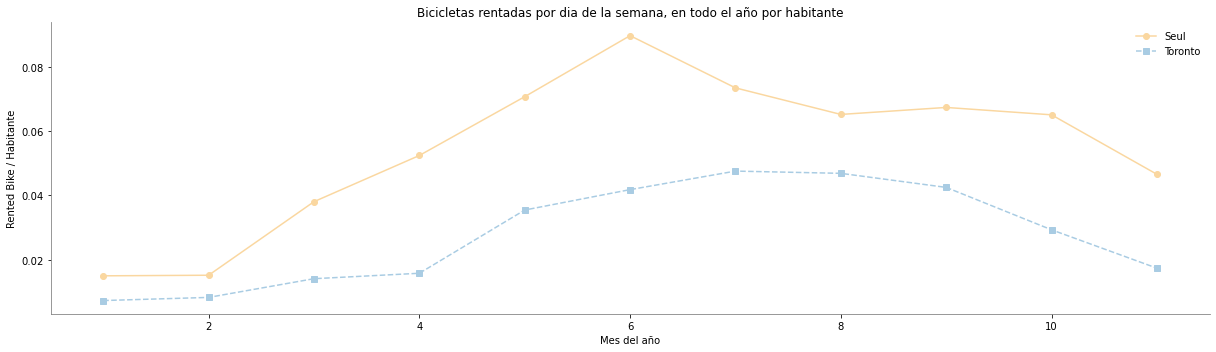

In [24]:
fig, ax = plt.subplots(figsize=(17,5 ))
hide_border(ax)


ax.plot(dataSeul.groupby('Month').sum()['Rented Bike Count']/10000000 , 'o-', label='Seul', color='#FAD7A0')
ax.plot(dataToronto.groupby('Month').sum()['Rented Bike Count']/6000000, 's--', label='Toronto', color='#A9CCE3')

ax.set_title("Bicicletas rentadas por dia de la semana, en todo el año por habitante")
ax.set_xlabel("Mes del año")
ax.set_ylabel("Rented Bike / Habitante")
ax.legend(frameon=False)

fig.tight_layout()



**Analisis por dia y noche**

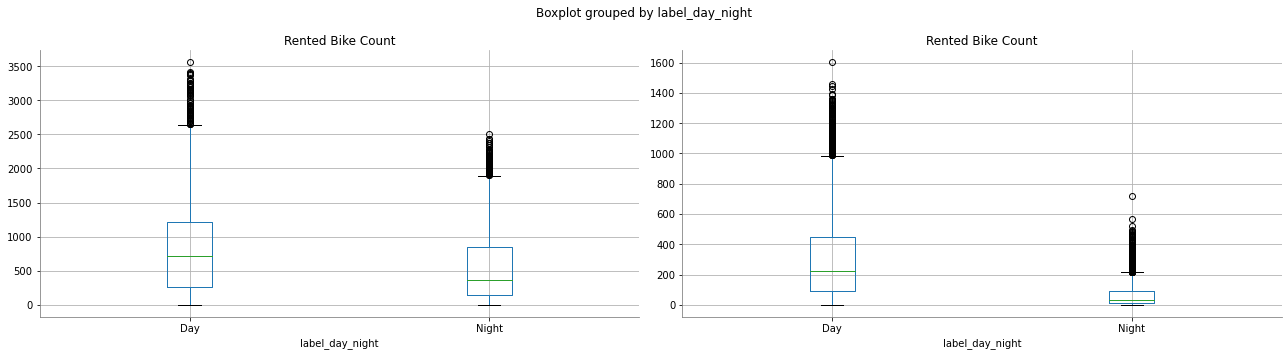

In [25]:

fig, ax = plt.subplots(1,2, figsize=(18,5 ))
hide_border(ax[0])
hide_border(ax[1])

boxplotDay_night= dataSeul.boxplot(['Rented Bike Count'] ,by='label_day_night' , ax=ax[0]  )
boxplotDay_night= dataToronto.boxplot(['Rented Bike Count'],by='label_day_night' , ax=ax[1]  )

plt.tight_layout()


En ambos países se observa que la mayor demanda de bicicletas se da en el dia comparado con la noche.

**Analisis variable por variable**

Variables climaticas vs Rented Bike



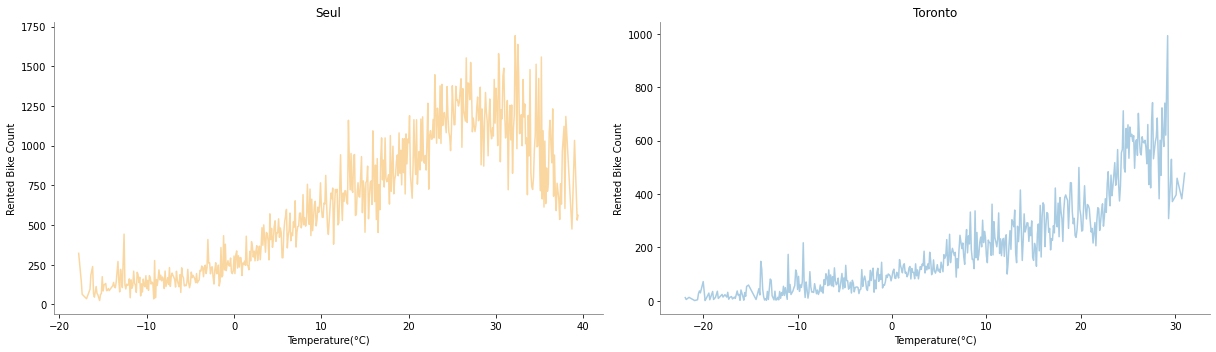

In [26]:
# Temperatura
fig, ax = plt.subplots(1,2, figsize=(17,5 ))
hide_border(ax[0])
hide_border(ax[1])



dataSeul.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul' , color='#FAD7A0' )
dataToronto.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto' , color='#A9CCE3' )

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

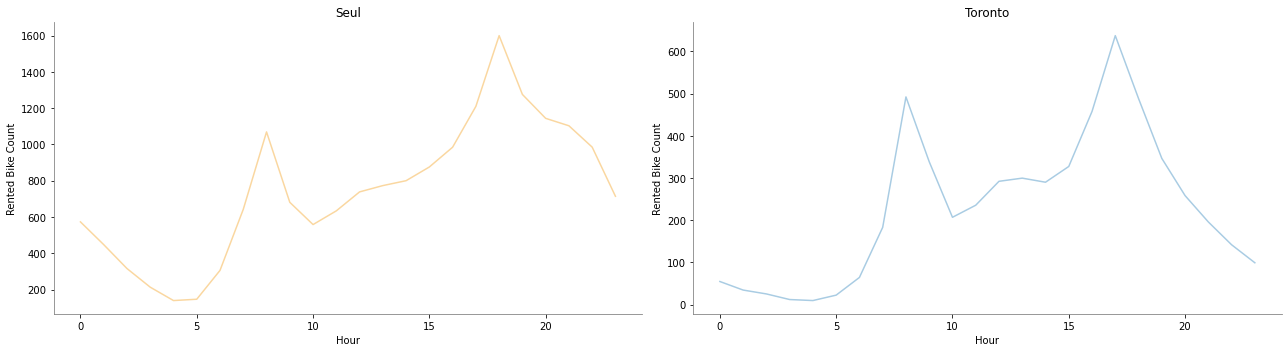

In [27]:
# Hora
fig, ax = plt.subplots(1,2, figsize=(18,5 ))
hide_border(ax[0])
hide_border(ax[1])

dataSeul.groupby('Hour').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul' , color='#FAD7A0' )
dataToronto.groupby('Hour').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto' , color='#A9CCE3' )

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

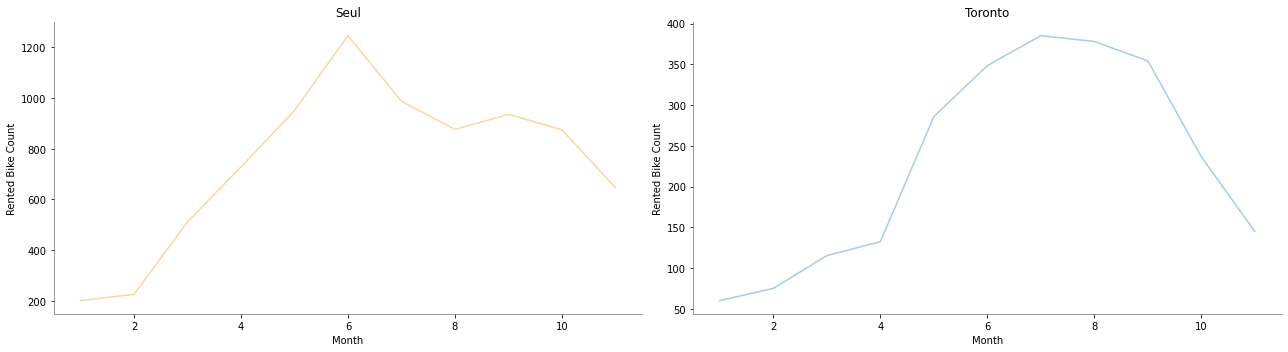

In [28]:
# Month
fig, ax = plt.subplots(1,2, figsize=(18,5 ))
hide_border(ax[0])
hide_border(ax[1])


dataSeul.groupby('Month').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul' , color='#FAD7A0' )
dataToronto.groupby('Month').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto', color='#A9CCE3')

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

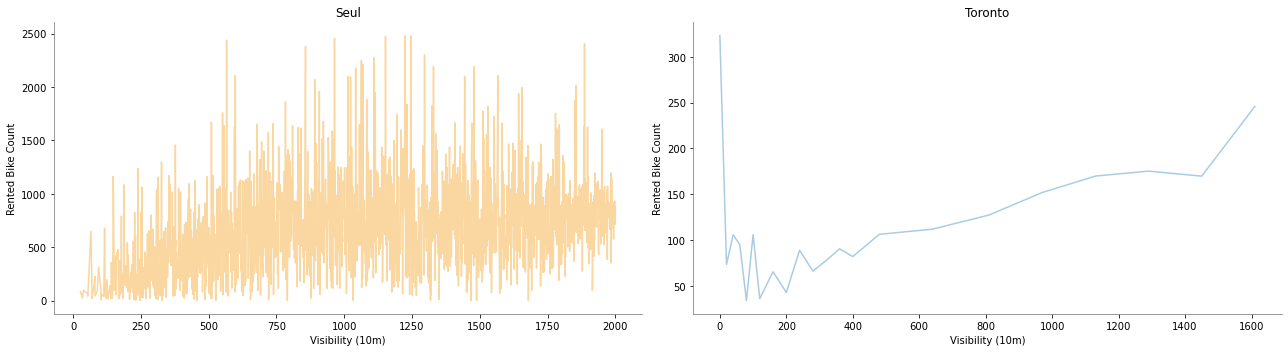

In [29]:
# Visibility (10m)
fig, ax = plt.subplots(1,2, figsize=(18,5 ))
hide_border(ax[0])
hide_border(ax[1])


dataSeul.groupby('Visibility (10m)').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul' , color='#FAD7A0')
dataToronto.groupby('Visibility (10m)').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto', color='#A9CCE3')


ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()


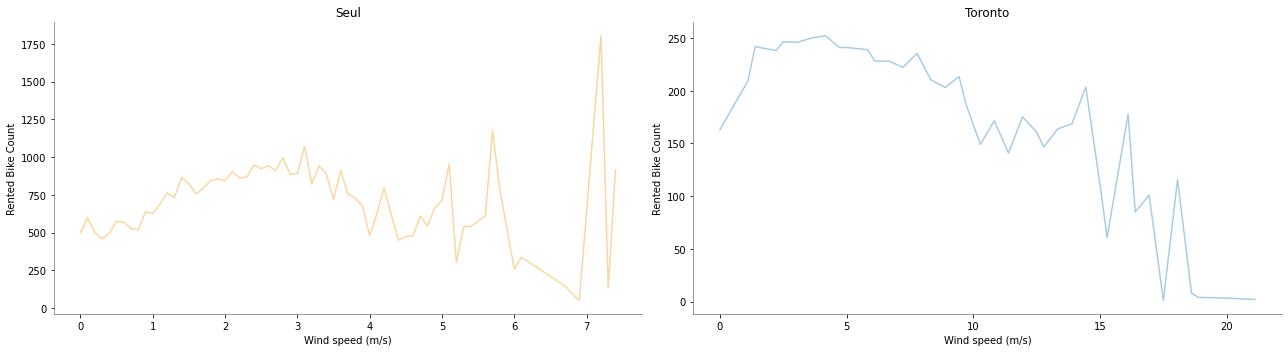

In [30]:
# Wind speed (m/s)
fig, ax = plt.subplots(1,2, figsize=(18,5 ))
hide_border(ax[0])
hide_border(ax[1])

dataSeul.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul' , color='#FAD7A0' )
dataToronto.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto', color='#A9CCE3')

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

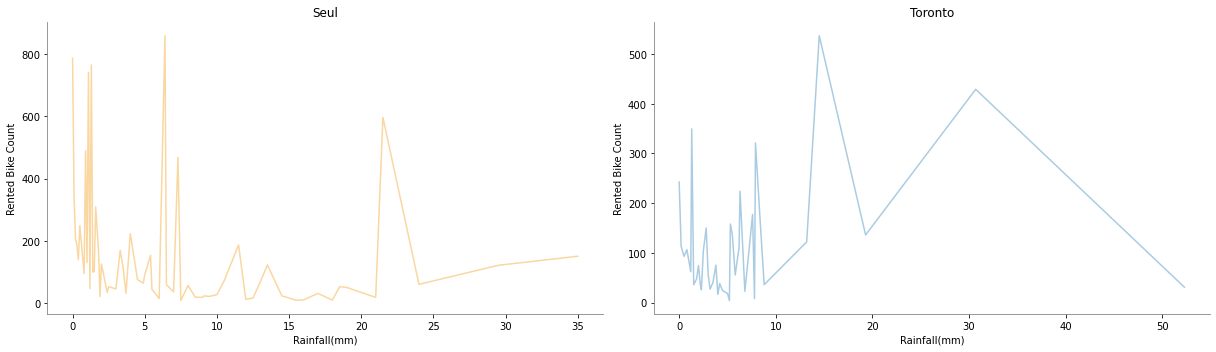

In [31]:
# Rainfall(mm)
fig, ax = plt.subplots(1,2, figsize=(17,5))
hide_border(ax[0])
hide_border(ax[1])

dataSeul.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul' , color='#FAD7A0'  )
dataToronto.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto', color='#A9CCE3')

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

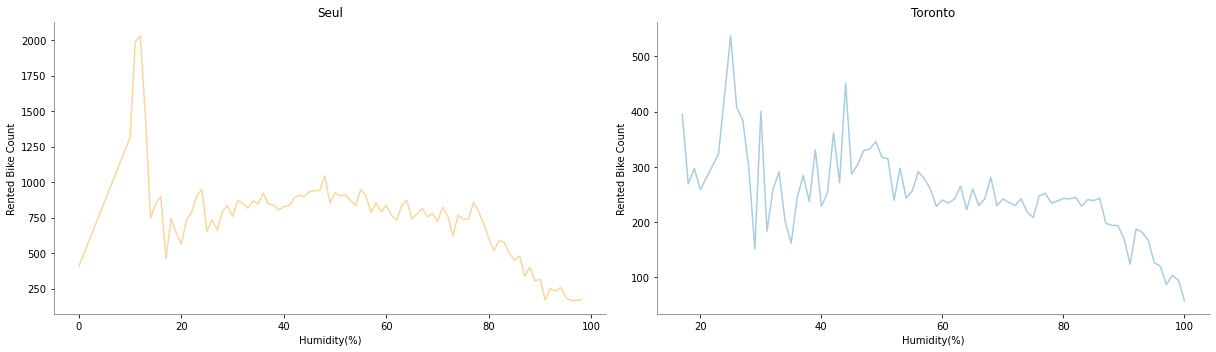

In [32]:
# Humidity(%)
fig, ax = plt.subplots(1,2, figsize=(17,5 ))
hide_border(ax[0])
hide_border(ax[1])


dataSeul.groupby('Humidity(%)').mean()['Rented Bike Count'].plot(  ax=ax[0] , title = 'Seul', color='#FAD7A0')
dataToronto.groupby('Humidity(%)').mean()['Rented Bike Count'].plot(  ax=ax[1] , title = 'Toronto', color='#A9CCE3')

ax[0].set_ylabel('Rented Bike Count')
ax[1].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()


##Modelos##

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [34]:
dataBikes.head()

,Rented Bike Count,Date,Hour,Seasons,Temperature(°C),Humidity(%),Rainfall(mm),label_day_night,WeekDay,Month,Wind speed (m/s),Visibility (10m),Seul
0,206,2018-01-01,0,Winter,-3.2,40.0,0.0,Night,Monday,1,0.5,1358.0,1
1,230,2018-01-01,1,Winter,-3.3,41.0,0.0,Night,Monday,1,0.7,2000.0,1
2,178,2018-01-01,2,Winter,-3.7,42.0,0.0,Night,Monday,1,0.9,2000.0,1
3,119,2018-01-01,3,Winter,-4.0,44.0,0.0,Night,Monday,1,1.0,2000.0,1
4,62,2018-01-01,4,Winter,-4.2,53.0,0.0,Night,Monday,1,1.1,1994.0,1


**Regresion lineal** 

In [35]:
# metricas
mse_1 = []
r2s_1 = []
asc_1 = []


tsz = [ 0.05 , 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.60  ]


x    = dataBikes.drop(['Rented Bike Count','Date','Seasons','label_day_night','WeekDay'],axis =1)
y    = dataBikes.iloc[:,0] #the target

for k in tsz :

  # datos de entrenamiento y test
  x_train, x_test, y_train, y_test = train_test_split(x   , y  , test_size = k)



  modelo = linear_model.LinearRegression()
  
  modelo.fit(x_train , y_train )

  y_pred = modelo.predict(x_test )

  mse_1.append(mean_squared_error(y_pred,y_test  ) )
  r2s_1.append(r2_score(y_test , y_pred ))


  #asc_1.append(accuracy_score(y_pred, y_test) )
  #x = accuracy_score(y_pred, y_test)  

  #from sklearn.metrics import f1_score
  #from sklearn.metrics import recall_score
  #from sklearn.metrics import precision_score
  #val_f1 = f1_score(y_test , y_pred , average='weighted')
  #val_recall = recall_score(y_test, y_pred, average='weighted')
  #val_precision = precision_score(y_test, y_pred, average='weighted')





tsz.insert(0, 'test_size')
mse_1.insert(0, 'mean square error')
r2s_1.insert(0, 'R2 score')

df = pd.DataFrame( [mse_1,r2s_1] , columns= tsz )
df.head()


,test_size,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6
0,mean square error,154828.014657,147797.524129,149401.316424,148457.765030,150645.048402,157522.650022,153262.507523,156640.171829,152999.977805
1,R2 score,0.526505,0.516412,0.527251,0.515133,0.513084,0.515623,0.516908,0.521754,0.521572


**Regresion lineal con datos de entrenamiento diferenciados** 

In [36]:

# metricas
mse_2 = []
r2s_2 = []
tsz = [ 0.05 , 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.60  ]


x_Seul    = dataBikes[ dataBikes['Seul']==1 ].drop(['Rented Bike Count','Date','Seasons','label_day_night','WeekDay'],axis =1)
y_Seul    = dataBikes[ dataBikes['Seul']==1 ].iloc[:,0] #the target

x_Toronto = dataBikes[ dataBikes['Seul']==0 ].drop(['Rented Bike Count','Date','Seasons','label_day_night','WeekDay'],axis =1)
y_Toronto = dataBikes[ dataBikes['Seul']==0 ].iloc[:,0] #the target


for k in tsz :
  x_train_Seul    , x_test_Seul    , y_train_Seul    , y_test_Seul     = train_test_split( x_Seul   , y_Seul   , test_size = k )
  x_train_Toronto , x_test_Toronto , y_train_Toronto , y_test_Toronto  = train_test_split( x_Toronto, y_Toronto, test_size = k )


  x_train = pd.concat([ x_train_Seul , x_train_Toronto] , axis=0)
  y_train = pd.concat([ y_train_Seul , y_train_Toronto] , axis=0)
  x_test  = pd.concat([ x_test_Seul  , x_test_Toronto] , axis=0)
  y_test  = pd.concat([ y_test_Seul  , y_test_Toronto] , axis=0)



  modelo = linear_model.LinearRegression()
  modelo.fit( x_train , y_train )

  y_pred = modelo.predict( x_test )

  mse_2.append(mean_squared_error(y_pred,y_test  ) )
  r2s_2.append(r2_score(y_test , y_pred ))


tsz.insert(0, 'test_size')
mse_2.insert(0, 'mean square error')
r2s_2.insert(0, 'R2 score')

df = pd.DataFrame( [mse_2,r2s_2] , columns= tsz )
df.head()



,test_size,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6
0,mean square error,151674.499422,148283.930331,161081.702391,156622.582509,147294.115318,151190.794908,153727.014625,151726.250985,148953.482065
1,R2 score,0.529436,0.518559,0.508125,0.512500,0.529386,0.519158,0.521187,0.515487,0.521660


**Regresión lineal solo para Seul**

In [37]:
# metricas
mse_3 = []
r2s_3 = []
tsz = [ 0.05 , 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.60  ]

# Solo nos quedamos con las variables numericas
x_Seul    = dataSeul.drop(['Rented Bike Count','Date','Seasons','label_day_night','WeekDay'],axis =1)
y_Seul    = dataSeul.iloc[:,0] #the target


for k in tsz :

  # Datos de entrenamiento
  x_train_Seul    , x_test_Seul   , y_train_Seul   , y_test_Seul     = train_test_split(x_Seul   , y_Seul  , test_size = k )

  # Modelo de regresion lineal
  modelo_Seul = linear_model.LinearRegression()
  modelo_Seul.fit(x_train_Seul , y_train_Seul )

  # prediccion
  y_pred_Seul  = modelo_Seul.predict(x_test_Seul )


  mse_3.append(mean_squared_error(y_pred_Seul,y_test_Seul  ) )
  r2s_3.append(r2_score(y_test_Seul , y_pred_Seul ))


tsz.insert(0, 'test_size')
mse_3.insert(0, 'mean square error')
r2s_3.insert(0, 'R2 score')

df = pd.DataFrame( [mse_3,r2s_3] , columns= tsz )
df.head()





,test_size,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6
0,mean square error,208218.680571,239896.574522,238371.872154,246552.925706,248486.703348,239206.103551,227755.765968,232450.849725,235563.930633
1,R2 score,0.483114,0.421254,0.463940,0.428977,0.439904,0.445459,0.468513,0.463686,0.451296


**Regresión lineal solo para Toronto**

In [38]:
# metricas
mse_4 = []
r2s_4 = []
tsz = [ 0.05 , 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.60  ]

for k in tsz :

  x_Toronto = dataToronto.drop(['Rented Bike Count','Date','Seasons','label_day_night','WeekDay'],axis =1)
  y_Toronto = dataToronto.iloc[:,0] #the target

  x_train_Toronto    , x_test_Toronto    , y_train_Toronto   , y_test_Toronto     = train_test_split(x_Toronto   , y_Toronto  , test_size = k )

  modelo_Toronto = linear_model.LinearRegression()
  modelo_Toronto.fit(x_train_Toronto , y_train_Toronto )

  y_pred_Toronto  = modelo_Toronto.predict(x_test_Toronto )

  mse_4.append(mean_squared_error(y_pred_Seul,y_test_Seul  ) )
  r2s_4.append(r2_score(y_test_Seul , y_pred_Seul ))


tsz.insert(0, 'test_size')
mse_4.insert(0, 'mean square error')
r2s_4.insert(0, 'R2 score')

df = pd.DataFrame( [mse_4,r2s_4] , columns= tsz )
df.head()



,test_size,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6
0,mean square error,235563.930633,235563.930633,235563.930633,235563.930633,235563.930633,235563.930633,235563.930633,235563.930633,235563.930633
1,R2 score,0.451296,0.451296,0.451296,0.451296,0.451296,0.451296,0.451296,0.451296,0.451296


Comparacion de Modelos

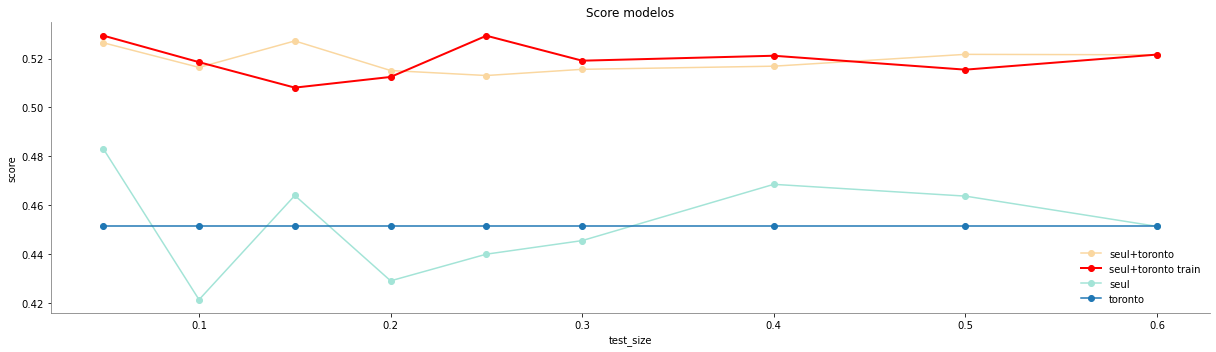

In [39]:

fig, ax = plt.subplots(1, 1, figsize=(17, 5))
hide_border(ax)

plt.plot(tsz[1::],r2s_1[1::], 'o-' , label='seul+toronto' , color='#FAD7A0' )
plt.plot(tsz[1::],r2s_2[1::], 'o-',label='seul+toronto train', linewidth=2 , color='red')
plt.plot(tsz[1::],r2s_3[1::], 'o-',label='seul', color= '#A3E4D7')
plt.plot(tsz[1::],r2s_4[1::], 'o-',label='toronto')


#plt.axvline(0.3, color = "Gray", linewidth = 1, linestyle = "dashed");
#plt.axhline(0.530931, color = "Gray", linewidth = 1, linestyle = "dashed" , xmax=0.45);

plt.title('Score modelos')
plt.xlabel('test_size')
plt.ylabel('score')
plt.legend(frameon=False)



fig.tight_layout()
plt.show()




